# Dementia and Alzheimers: Early Predictors

In [1]:
# Libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt 
import statsmodels.api as sm
from statsmodels.formula.api import ols

sns.set(rc={'figure.figsize':(11.7,8.27)}) # set this variable to enlarge the plots 

# OASIS1

## Data Cleanup and Feature Engineering


In [2]:
# Cross-sectional dataset 
!curl "https://www.oasis-brains.org/files/oasis_cross-sectional.csv" > oasis1.csv
oasis1 = pd.read_csv("oasis1.csv")

oasis1.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21720  100 21720    0     0  44146      0 --:--:-- --:--:-- --:--:-- 44236


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [3]:
oasis1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


The first thing that we notice about **OASIS1 (cross-sectional dataset)** is that it looks like there are very few entries for the Delay column, so let's just drop that completely. We would not be able to draw any conclusions from the few records that do exist.

In [4]:
oasis1 = oasis1.drop(columns="Delay")
oasis1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 37.6+ KB


In [5]:
oasis1.nunique()

ID      436
M/F       2
Hand      1
Age      73
Educ      5
SES       5
MMSE     17
CDR       4
eTIV    312
nWBV    182
ASF     282
dtype: int64

Now we observe that the Education level, SocioEconomic Status, Mini Mental State Examination score, and Clinical Dementia Rating are only filled out for around half of the participants. I am not sure that I want to drop that many records completely, so I will leave in those records, but return to addressing this later in the analysis process. 

We will encode the Male/Female column as categorical for easier analysis. We will also encode the Education and Clinical Dementia Rating variables to categorical values. The documentation found here (https://www.oasis-brains.org/files/oasis_cross-sectional_facts.pdf) states the following: 

"Education codes correspond to the following levels of education: 1: less than high school grad., 2: high school grad., 3: some college, 4: college grad., 5: beyond college."

and 

"Clinical Dementia Rating (CDR; 0= nondemented; 0.5 – very mild dementia; 1 = mild dementia; 2 = moderate dementia) (Morris, 1993). All participants with dementia (CDR >0) were diagnosed with probable AD."

Therefore, it is not appropriate to treat these variables as integer types; they are discrete categories and should be treated as such. 

We will add a column to the dataset called "Group" that will differentiate subjects with and without a diagnosis. This column will also be categorical.

The other thing that we will do is drop the "Hand" column, because there is only one value in this dataset, as shown above; everyone is right-handed in the study.

In [6]:
oasis1['M/F'] = oasis1['M/F'].astype("category")
oasis1['Educ'] = oasis1['Educ'].astype("category")
oasis1['CDR'] = oasis1['CDR'].astype("category")

oasis1['Group'] = ["Demented" if x>0 else "Nondemented" for x in oasis1['CDR']]
oasis1['Group'] = oasis1['Group'].astype("category")

oasis1 = oasis1.drop(columns="Hand")

oasis1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   ID      436 non-null    object  
 1   M/F     436 non-null    category
 2   Age     436 non-null    int64   
 3   Educ    235 non-null    category
 4   SES     216 non-null    float64 
 5   MMSE    235 non-null    float64 
 6   CDR     235 non-null    category
 7   eTIV    436 non-null    int64   
 8   nWBV    436 non-null    float64 
 9   ASF     436 non-null    float64 
 10  Group   436 non-null    category
dtypes: category(4), float64(4), int64(2), object(1)
memory usage: 26.2+ KB


Let's view the distribution of the variables, all together, and divided by diagnosis. 

array([<AxesSubplot:title={'center':'Demented'}>,
       <AxesSubplot:title={'center':'Nondemented'}>], dtype=object)

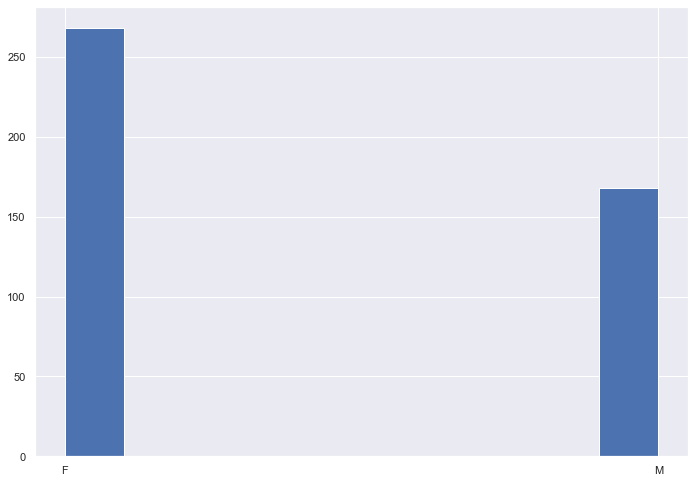

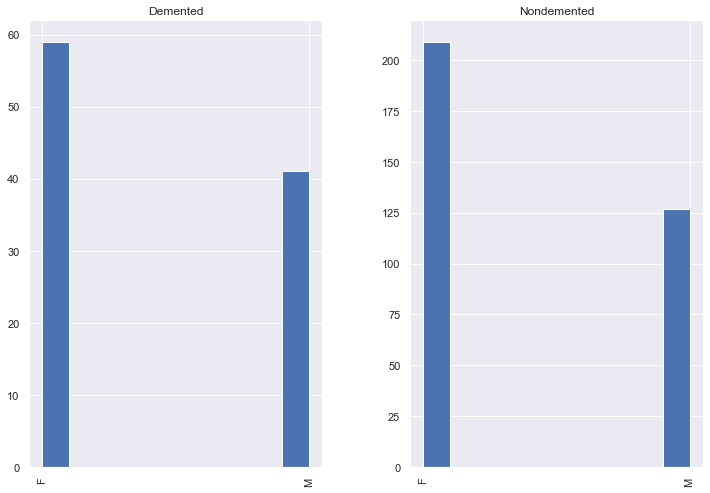

In [7]:
oasis1['M/F'].hist()
oasis1['M/F'].hist(by=oasis1.Group)

array([<AxesSubplot:title={'center':'Demented'}>,
       <AxesSubplot:title={'center':'Nondemented'}>], dtype=object)

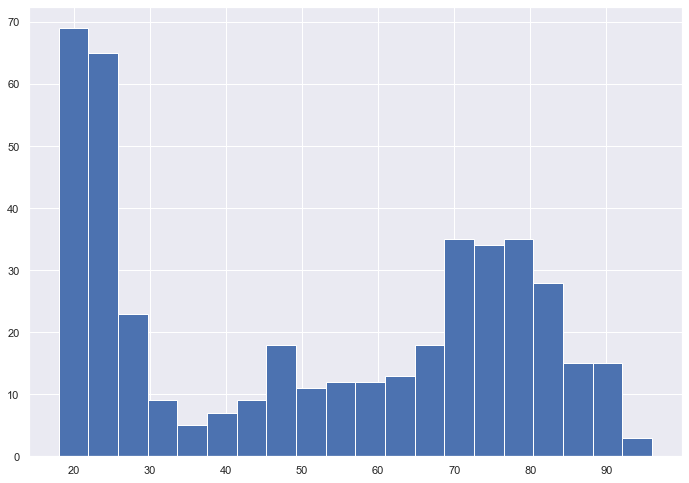

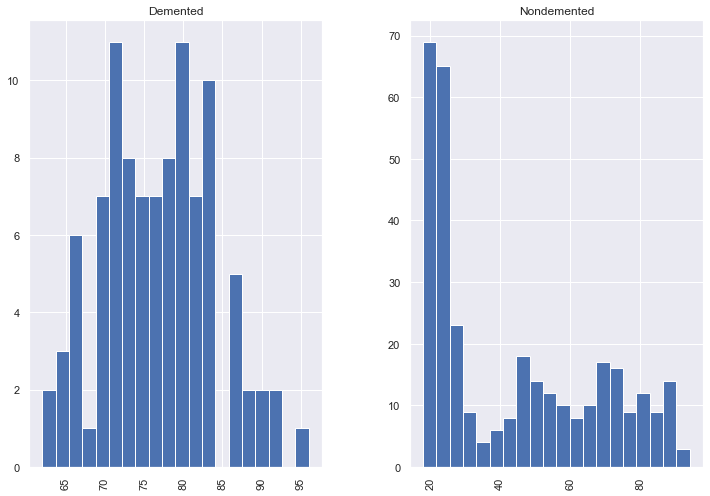

In [8]:
oasis1.Age.hist(bins=20)
oasis1.Age.hist(by=oasis1.Group,bins=20)

array([<AxesSubplot:title={'center':'Demented'}>,
       <AxesSubplot:title={'center':'Nondemented'}>], dtype=object)

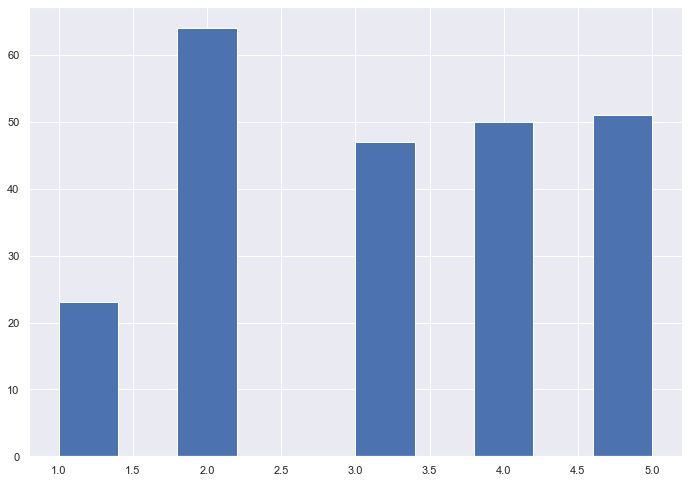

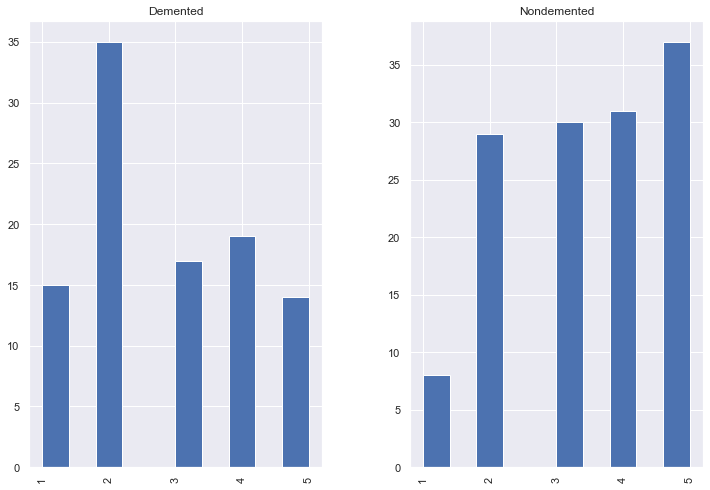

In [9]:
oasis1.Educ.hist()
oasis1.Educ.hist(by=oasis1.Group)

array([<AxesSubplot:title={'center':'Demented'}>,
       <AxesSubplot:title={'center':'Nondemented'}>], dtype=object)

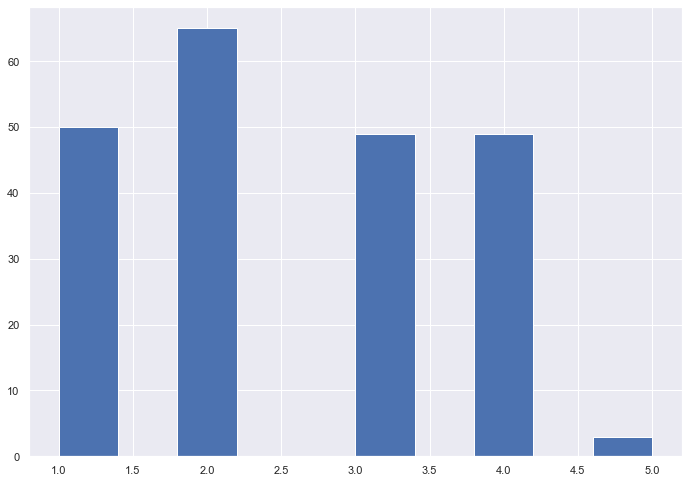

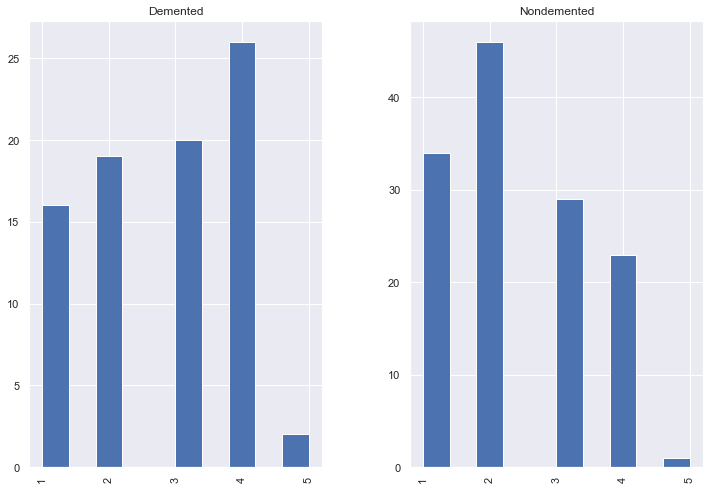

In [10]:
oasis1.SES.hist()
oasis1.SES.hist(by=oasis1.Group)

array([<AxesSubplot:title={'center':'Demented'}>,
       <AxesSubplot:title={'center':'Nondemented'}>], dtype=object)

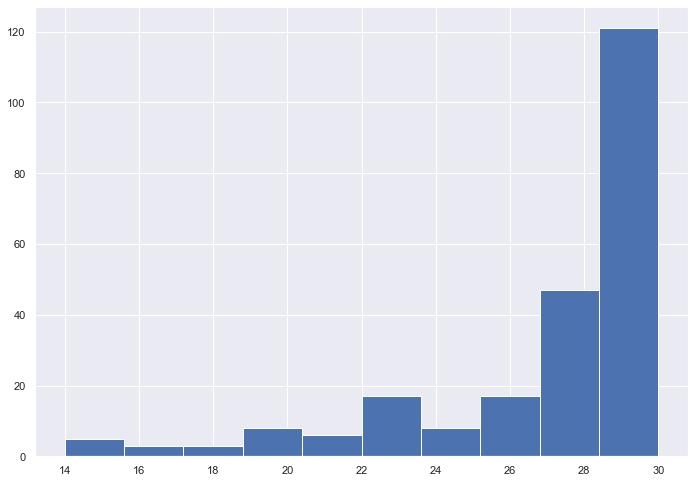

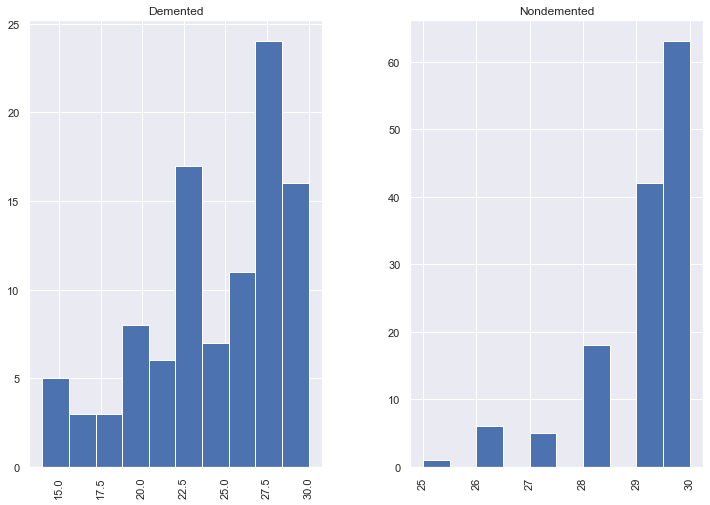

In [11]:
oasis1.MMSE.hist()
oasis1.MMSE.hist(by=oasis1.Group)

array([<AxesSubplot:title={'center':'Demented'}>,
       <AxesSubplot:title={'center':'Nondemented'}>], dtype=object)

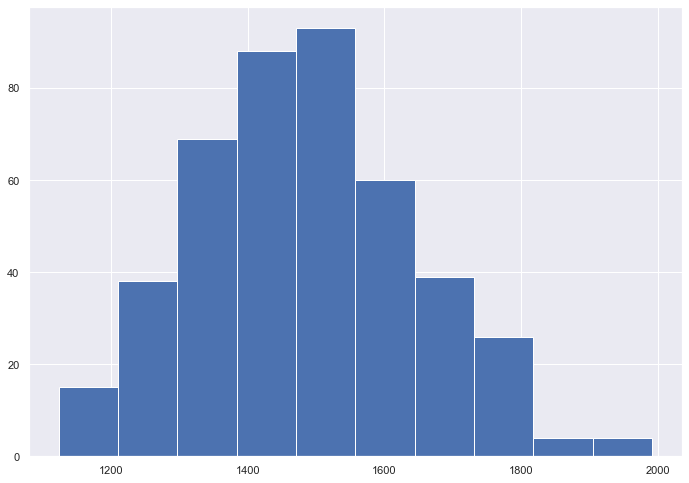

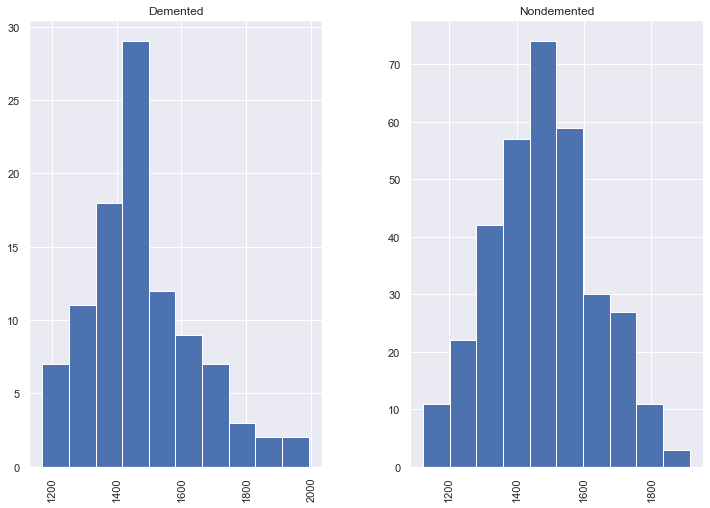

In [12]:
oasis1.eTIV.hist()
oasis1.eTIV.hist(by=oasis1.Group)

array([<AxesSubplot:title={'center':'Demented'}>,
       <AxesSubplot:title={'center':'Nondemented'}>], dtype=object)

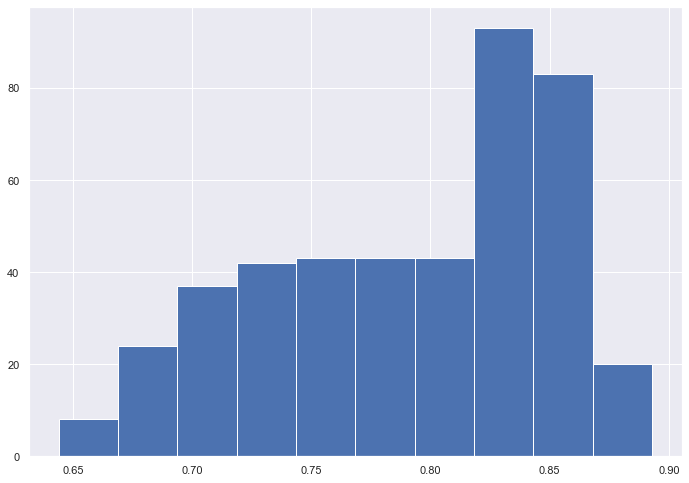

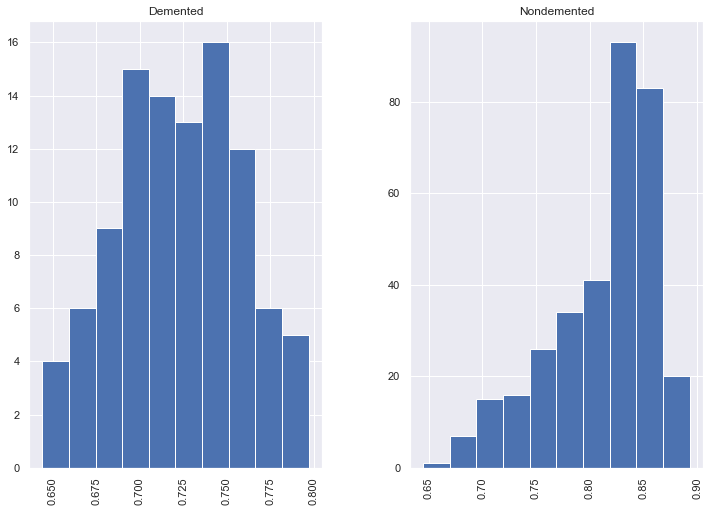

In [13]:
oasis1.nWBV.hist()
oasis1.nWBV.hist(by=oasis1.Group)

array([<AxesSubplot:title={'center':'Demented'}>,
       <AxesSubplot:title={'center':'Nondemented'}>], dtype=object)

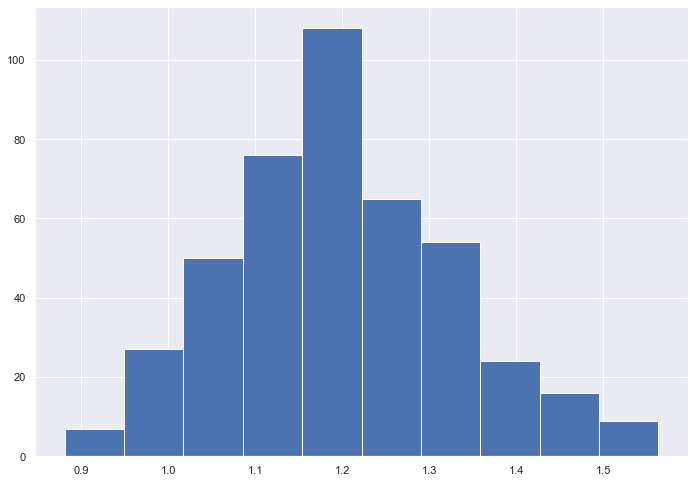

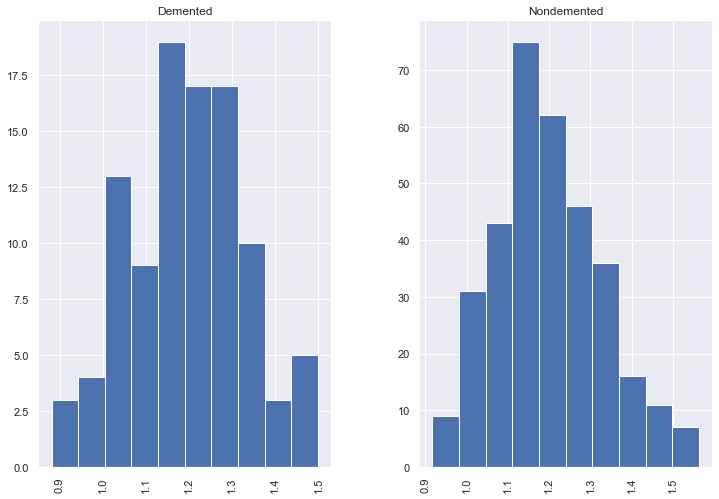

In [14]:
oasis1.ASF.hist()
oasis1.ASF.hist(by=oasis1.Group)

<AxesSubplot:>

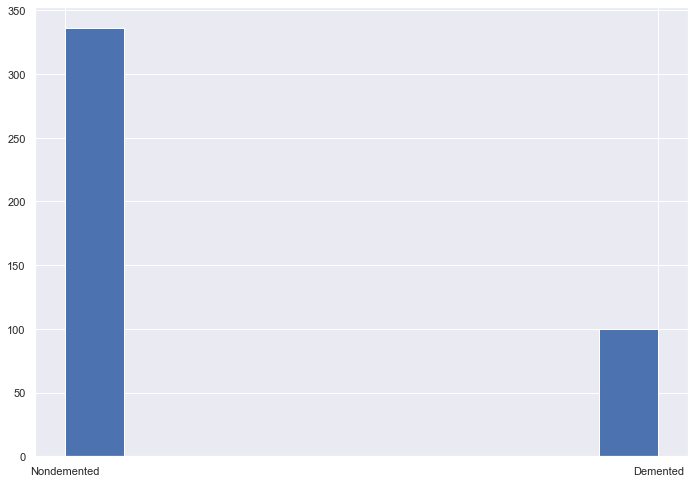

In [15]:
oasis1.Group.hist()

As we can see from the above histograms, there are many more nondemented participants in the study than demented, and more females than males in the study, but we can still see some trends that make sense from the diagnosis. 

First, there is quite a skew of age between demented and non-demented; there are quite a few twenty-year-olds without a dementia diagnosis, and the distribution of demented subjects is centered firmly around eighty years. 

Next, more of the demented subjects only had a high school education, while the nondemented subjects were skewed toward more education. 

Interestingly, the socieoeconomic status of the demented group was skewed higher than the nondemented, but I think this can be explained by age and experience and years working. 

The Mini Mental State Examination score is heavily skewed toward lower scores in the demented group compared to the nondemented group, unsurprisingly.

The estimated Total Intracranial Volume is also skewed toward lower numbers for dementia participants, and looks more like a normal distribution for nondemented participants.

Brain volume is heavily skewed toward the right for nondemented participants, while the distribution is more normal for demented participants.

Interestingly, the Atlas Scaling Factor distribution doesn't seem to be too different between groups, but the demented group might be scaled more and skewed right than the nondemented group.

Let's visualize this slightly differently and take the eTIV and nWBV variables to be our outcome metrics with some box-and-whisker plots to make sure no outliers are skewing the data.

<AxesSubplot:xlabel='Group', ylabel='eTIV'>

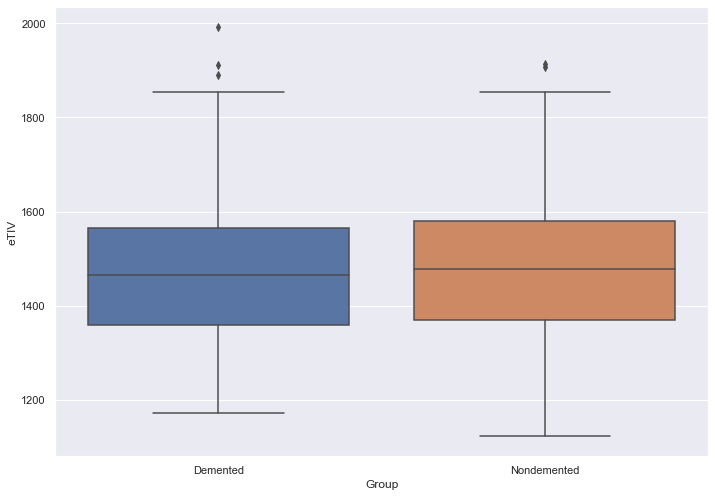

In [16]:
sns.boxplot(x=oasis1.Group,y=oasis1.eTIV)

<AxesSubplot:xlabel='Group', ylabel='nWBV'>

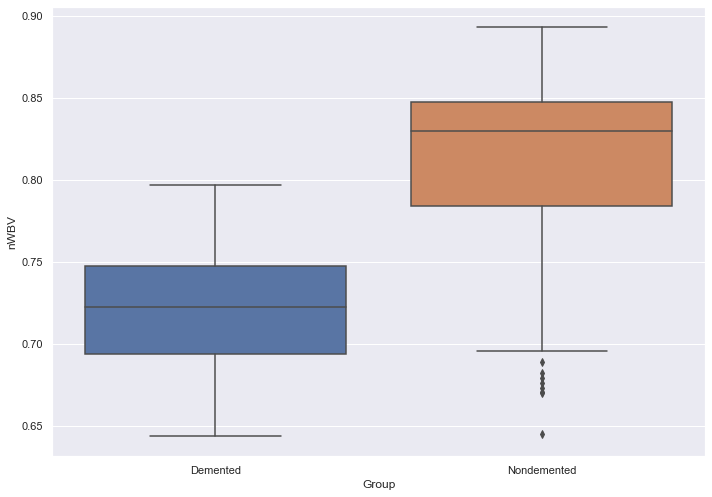

In [17]:
sns.boxplot(x=oasis1.Group,y=oasis1.nWBV)

The above plots display that there are some some eTIV values above the quartile range for both the Demented and Nondemented groups. Interestingly, the mean for those two groups seems quite similar. It seems reasonable to remove those outliers.

There are a few outliers below the lower quartile in the Nondemented group in terms of WBV, although none seem lower than the lower boundary for the Demented group quartile. I will make the decision to leave in these values, because the decrease in volume is expected with age.  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 435
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   ID      429 non-null    object  
 1   M/F     429 non-null    category
 2   Age     429 non-null    int64   
 3   Educ    231 non-null    category
 4   SES     212 non-null    float64 
 5   MMSE    231 non-null    float64 
 6   CDR     231 non-null    category
 7   eTIV    429 non-null    int64   
 8   nWBV    429 non-null    float64 
 9   ASF     429 non-null    float64 
 10  Group   429 non-null    category
dtypes: category(4), float64(4), int64(2), object(1)
memory usage: 29.1+ KB


<ipython-input-18-23fff5675f88>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  oasis1.final = oasis1[oasis1.eTIV <= 1850]


<AxesSubplot:xlabel='Group', ylabel='eTIV'>

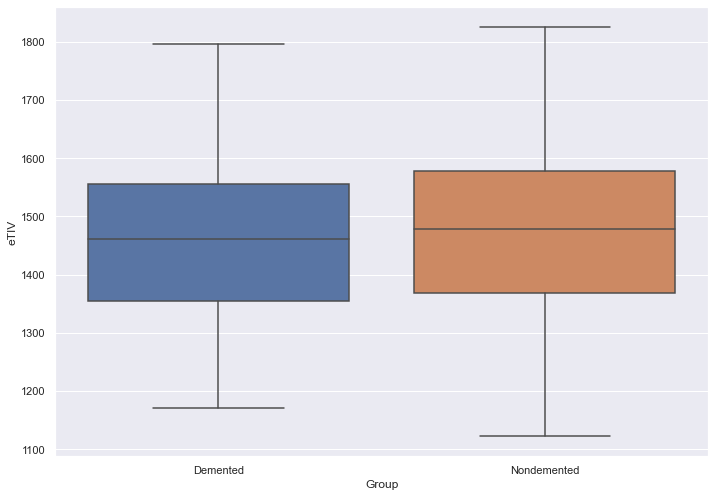

In [18]:
oasis1.final = oasis1[oasis1.eTIV <= 1850]
oasis1.final.info()
sns.boxplot(x=oasis1.final.Group,y=oasis1.final.eTIV)

Now let's attempt to find out if there are any clear correlations that we can see now that we've cleaned up the data a bit. Let's look at a heatmap of the correlations of the numeric variables. Correlations and predictions are what we are trying to find, after all. 

<AxesSubplot:>

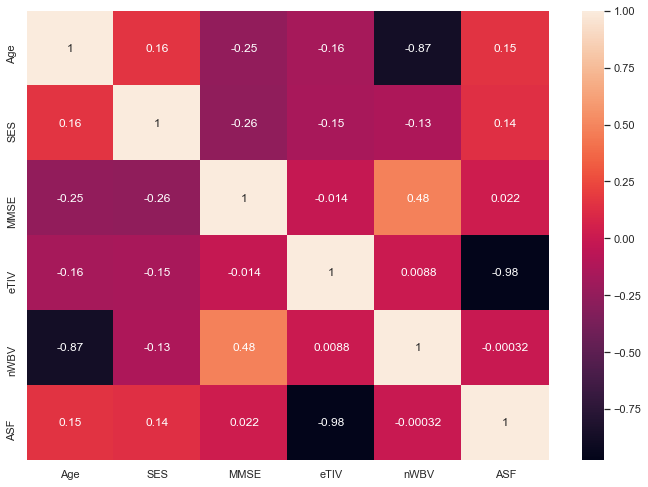

In [19]:
sns.heatmap(oasis1.final.corr(),annot=True)

When we look at the above heatmap, we can pay particular attention to the eTIV (estimated Total Intracranial Volume) and nWBV (normalized Whole Brain Volume). Lower values of both of those will probably indicate some issues with dementia, and higher values indicate a healthy brain. 

We can see that Age is quite obviously negatively correlated with nWBV, which is unsurprising. Everyone loses white matter as they age. 

The ASF (Atlas Scale Factor), or the amount that the images have to be adjusted in order to align with the atlas sample, is negatively correlated to eTIV. This also makes sense, as the more distorted that the brain image is, the less volume it probably has. 

The other significant correlation that we can see from this table is that the MMSE (Mini Mental State Examination) score is positively correlated with nWBV. This makes sense, in that if a subject scores higher on the test, it is to be expected that their brain volume is substantial.

## Analysis

Now let's actually get down to some analysis. Let's first get dummy variables for the categorical variables.

In [20]:
oasis1.expand = pd.get_dummies(data=oasis1.final,columns=['M/F','Educ','CDR'])
oasis1.expand.head()

<ipython-input-20-a34b7c301d4e>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  oasis1.expand = pd.get_dummies(data=oasis1.final,columns=['M/F','Educ','CDR'])


,ID,Age,SES,MMSE,eTIV,nWBV,ASF,Group,M/F_F,M/F_M,Educ_1.0,Educ_2.0,Educ_3.0,Educ_4.0,Educ_5.0,CDR_0.0,CDR_0.5,CDR_1.0,CDR_2.0
0,OAS1_0001_MR1,74,3.0,29.0,1344,0.743,1.306,Nondemented,1,0,0,1,0,0,0,1,0,0,0
1,OAS1_0002_MR1,55,1.0,29.0,1147,0.810,1.531,Nondemented,1,0,0,0,0,1,0,1,0,0,0
2,OAS1_0003_MR1,73,3.0,27.0,1454,0.708,1.207,Demented,1,0,0,0,0,1,0,0,1,0,0
3,OAS1_0004_MR1,28,NaN,NaN,1588,0.803,1.105,Nondemented,0,1,0,0,0,0,0,0,0,0,0
4,OAS1_0005_MR1,18,NaN,NaN,1737,0.848,1.010,Nondemented,0,1,0,0,0,0,0,0,0,0,0


We can't directly regress to the "Group" variable because this value is not numeric. Instead, let's focus on the normalized Whole Brain Volume variable as a stand-in for Group because there were obvious differences as we saw in the histograms and boxplots above. Let's assume a linear correlation between nWBV and other variables and the Group classification. 

In [21]:
first_model = ols("nWBV ~ Group + Educ + CDR + Age + SES + MMSE + eTIV", data=oasis1.final).fit()
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   nWBV   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     35.87
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           1.67e-41
Time:                        14:28:06   Log-Likelihood:                 456.93
No. Observations:                 212   AIC:                            -889.9
Df Residuals:                     200   BIC:                            -849.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.7314      0.029     25.521      0.000       0.675       0.788
Group[T.Nondemented]     0.1966      0.012     16.315      0.000       0.173       0.220
Educ[T.2.0]              0.0115      0.008      1.512      0.132      -0.003       0.026
Educ[T.3.0]              0.0147      0.008      1.761      0.080      -0.002       0.031
Educ[T.4.0]              0.0077      0.009      0.821      0.412      -0.011       0.026
Educ[T.5.0]              0.0068      0.010      0.690      0.491      -0.013       0.026
CDR[T.0.5]               0.1846      0.011     17.563      0.000       0.164       0.205
CDR[T.1.0]               0.1743      0.009     18.794      0.000       0.156       0.193
CDR[T.2.0]               0.1759      0.018      9.882      0.000       0.141       0.211
Age                     -0.0025      0.000    -14.096      0.000      -0.003      -0.002
SES                      0.0011      0.003      0.398      0.691      -0.004       0.006
MMSE                     0.0022      0.001      2.366      0.019       0.000       0.004
eTIV                 -4.584e-05   1.39e-05     -3.305      0.001   -7.32e-05   -1.85e-05
==============================================================================
Omnibus:                        2.029   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.363   Jarque-Bera (JB):                1.952
Skew:                          -0.234   Prob(JB):                        0.377
Kurtosis:                       2.960   Cond. No.                     4.90e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.88e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The R^2 value is decent at .665, and so we can conclude that it is possible to make predictions of brain volume if we have information on these other variables. Let's see if removing all of the demographic information will help or hinder this process. 

In [22]:
second = ols("nWBV ~ MMSE + eTIV + CDR + ASF", data=oasis1.final).fit()
second.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   nWBV   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     16.78
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           5.71e-16
Time:                        14:28:06   Log-Likelihood:                 416.62
No. Observations:                 231   AIC:                            -819.2
Df Residuals:                     224   BIC:                            -795.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8179      0.407      2.010      0.046       0.016       1.620
CDR[T.0.5]    -0.0263      0.007     -3.624      0.000      -0.041      -0.012
CDR[T.1.0]    -0.0370      0.012     -3.129      0.002      -0.060      -0.014
CDR[T.2.0]    -0.0391      0.033     -1.191      0.235      -0.104       0.026
MMSE           0.0032      0.001      2.945      0.004       0.001       0.005
eTIV       -7.597e-05      0.000     -0.548      0.584      -0.000       0.000
ASF           -0.0271      0.167     -0.162      0.872      -0.357       0.303
==============================================================================
Omnibus:                        5.351   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.276
Skew:                          -0.331   Prob(JB):                       0.0715
Kurtosis:                       2.669   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Unsurprisingly, this does help to drastically decrease the R^2 value of the model, with an R^2 value of .310. I suspect this to be because the Age variable is such a good predictor of brain volume that taking it out will hurt the algorihtm. We would have to explore more complex regression techniques than are in the scope of this project in order to find exactly what demographic information is a good predictor of nWBV.

# OASIS2

## Data Cleanup and Setup

Let's move on to the **OASIS2 (longitudinal dataset)**. We will be categorizing the gender and CDR variables as we did with the cross-sectional dataset. The education variable is counted as years of education, not categorized, so we will leave that variable as-is. We can categorize the "Group" variable as it only has two values of "Demented" or "Nondemented"

In [23]:
# Longitudinal dataset
!curl "https://www.oasis-brains.org/files/oasis_longitudinal_demographics.xlsx" > oasis2.csv
oasis2 = pd.read_excel("oasis2.csv")

oasis2.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 50743  100 50743    0     0   123k      0 --:--:-- --:--:-- --:--:--  123k


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


In [24]:
oasis2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    float64
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(6), int64(4), object(5)
memory usage: 43.8+ KB


In [25]:
oasis2['M/F'] = oasis2['M/F'].astype("category")
oasis2['CDR'] = oasis2['CDR'].astype("category")
oasis2['Group'] = oasis2['Group'].astype("category")

oasis2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Subject ID  373 non-null    object  
 1   MRI ID      373 non-null    object  
 2   Group       373 non-null    category
 3   Visit       373 non-null    int64   
 4   MR Delay    373 non-null    int64   
 5   M/F         373 non-null    category
 6   Hand        373 non-null    object  
 7   Age         373 non-null    int64   
 8   EDUC        373 non-null    int64   
 9   SES         354 non-null    float64 
 10  MMSE        371 non-null    float64 
 11  CDR         373 non-null    category
 12  eTIV        373 non-null    float64 
 13  nWBV        373 non-null    float64 
 14  ASF         373 non-null    float64 
dtypes: category(3), float64(5), int64(4), object(3)
memory usage: 36.6+ KB


In [26]:
oasis2.nunique()

Subject ID    150
MRI ID        373
Group           3
Visit           5
MR Delay      201
M/F             2
Hand            1
Age            39
EDUC           12
SES             5
MMSE           18
CDR             4
eTIV          371
nWBV          373
ASF           371
dtype: int64

All participants in this study were also right-handed, so we will drop that column. 

In [27]:
oasis2 = oasis2.drop(columns="Hand")

Interestingly, this dataset is much more complete than the other, with only twenty or so values missing from the SocioEconomic Status variable and only two values missing from the MMSE variable. Before we drop these values, let's make sure that this wasn't a data entry error and that there are no SES values for that specific subject anywhere that weren't transferred to all records. 

In [28]:
missing = oasis2[oasis2['SES'].isnull()]
oasis2['SES'].isnull().sum()
missing

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,71,16,NaN,28.0,0.5,1357.330000,0.748085,1.292980
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,73,16,NaN,27.0,1.0,1364.500000,0.727032,1.286180
12,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,75,16,NaN,27.0,1.0,1372.115333,0.709954,1.279047
134,OAS2_0063,OAS2_0063_MR1,Demented,1,0,F,80,12,NaN,30.0,0.5,1429.530000,0.736988,1.227670
135,OAS2_0063,OAS2_0063_MR2,Demented,2,490,F,81,12,NaN,27.0,0.5,1453.050000,0.721043,1.207810
207,OAS2_0099,OAS2_0099_MR1,Demented,1,0,F,80,12,NaN,27.0,0.5,1474.970000,0.762489,1.189850
208,OAS2_0099,OAS2_0099_MR2,Demented,2,807,F,83,12,NaN,23.0,0.5,1483.779876,0.750399,1.182790


In [29]:
missing_grouped = missing['Subject ID'].groupby(missing['Subject ID']).count()
missing_grouped

Subject ID
OAS2_0002    3
OAS2_0007    3
OAS2_0063    2
OAS2_0099    2
OAS2_0114    2
OAS2_0160    2
OAS2_0181    3
OAS2_0182    2
Name: Subject ID, dtype: int64

As shown above, eight subjects have missing socioeconomic status data, and one of those subjects also makes up the missing data for the MMSE scores. It seems reasonable that we can drop the information relating to these patients without losing too much information in the overall dataset. 

In [30]:
oasis2 = oasis2.dropna()
oasis2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 372
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Subject ID  354 non-null    object  
 1   MRI ID      354 non-null    object  
 2   Group       354 non-null    category
 3   Visit       354 non-null    int64   
 4   MR Delay    354 non-null    int64   
 5   M/F         354 non-null    category
 6   Age         354 non-null    int64   
 7   EDUC        354 non-null    int64   
 8   SES         354 non-null    float64 
 9   MMSE        354 non-null    float64 
 10  CDR         354 non-null    category
 11  eTIV        354 non-null    float64 
 12  nWBV        354 non-null    float64 
 13  ASF         354 non-null    float64 
dtypes: category(3), float64(5), int64(4), object(2)
memory usage: 34.6+ KB


Now let's see how many individual subjects we are dealing with. Because this is a longitudinal dataset, most subjects have multiple entries in this database, and we don't want to weight the data with duplicates.

In [31]:
unique = oasis2.nunique()
unique

Subject ID    142
MRI ID        354
Group           3
Visit           5
MR Delay      192
M/F             2
Age            39
EDUC           12
SES             5
MMSE           18
CDR             4
eTIV          353
nWBV          354
ASF           353
dtype: int64

It looks like there are 142 unique subjects in the study, some of whom had MRIs taken up to 5 times. Let's create a subset of the data for all the individual values of gender, education, socioeconomic status, etc. so that we don't weight the data unevenly. 

In [32]:
oasis2_unique = oasis2.drop_duplicates(subset = ["Subject ID"])
oasis2_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 370
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Subject ID  142 non-null    object  
 1   MRI ID      142 non-null    object  
 2   Group       142 non-null    category
 3   Visit       142 non-null    int64   
 4   MR Delay    142 non-null    int64   
 5   M/F         142 non-null    category
 6   Age         142 non-null    int64   
 7   EDUC        142 non-null    int64   
 8   SES         142 non-null    float64 
 9   MMSE        142 non-null    float64 
 10  CDR         142 non-null    category
 11  eTIV        142 non-null    float64 
 12  nWBV        142 non-null    float64 
 13  ASF         142 non-null    float64 
dtypes: category(3), float64(5), int64(4), object(2)
memory usage: 14.1+ KB


Let's take a look at the density of distribution for the demographic information of variables in this dataset. We'll look at the brain measurement volumes as part of the total dataset. The histograms are both over the whole dataset and grouped by diagnosis. The "Converted" group are participants who were not classified as having dementia at the beginning of the study, but were diagnosed with dementia by the end of the study.

array([[<AxesSubplot:title={'center':'Converted'}>,
        <AxesSubplot:title={'center':'Demented'}>],
       [<AxesSubplot:title={'center':'Nondemented'}>, <AxesSubplot:>]],
      dtype=object)

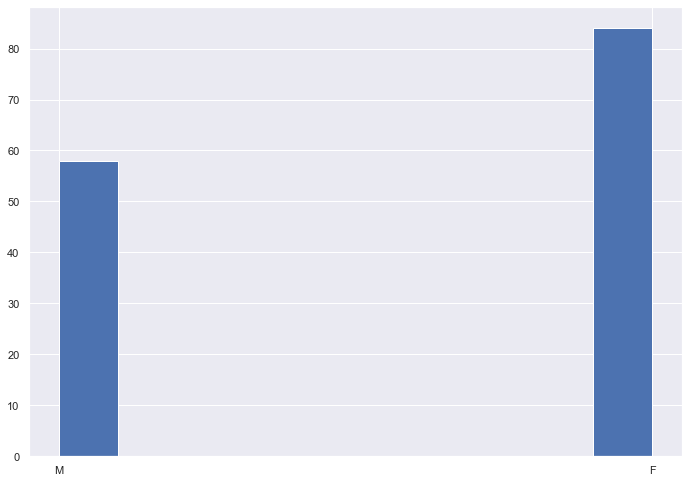

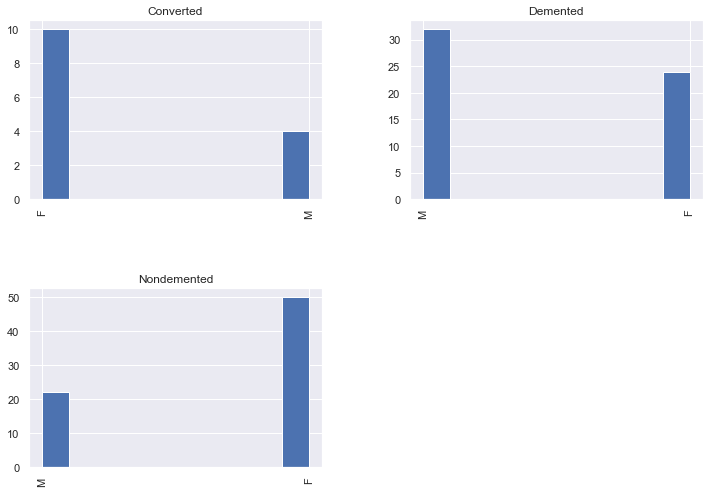

In [33]:
oasis2_unique['M/F'].hist()
oasis2_unique['M/F'].hist(by=oasis2_unique.Group)

array([[<AxesSubplot:title={'center':'Converted'}>,
        <AxesSubplot:title={'center':'Demented'}>],
       [<AxesSubplot:title={'center':'Nondemented'}>, <AxesSubplot:>]],
      dtype=object)

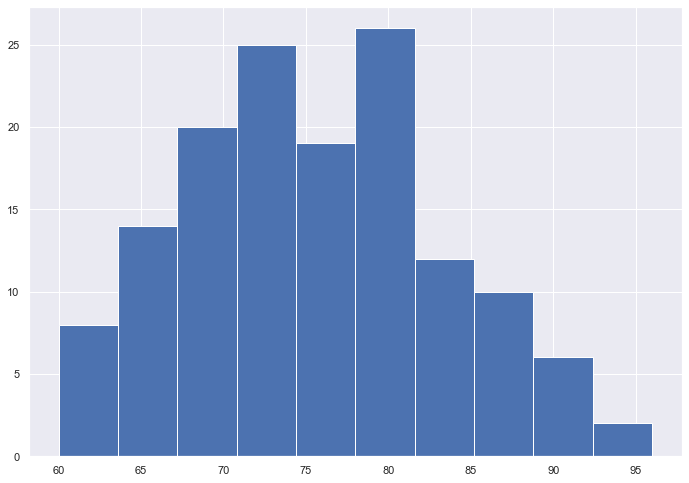

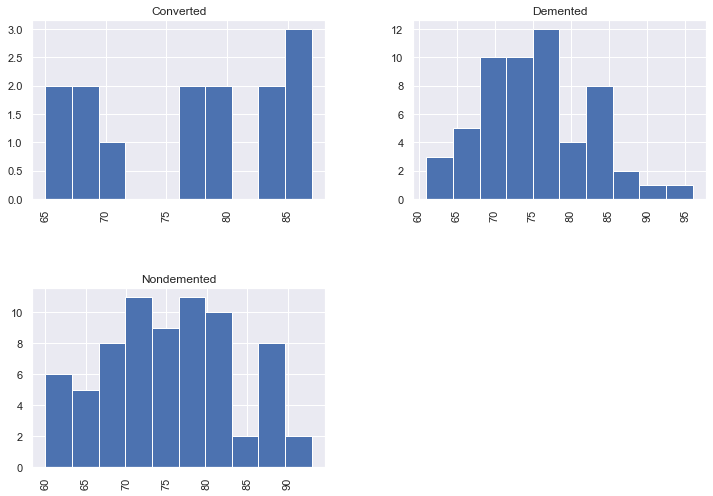

In [34]:
oasis2_unique.Age.hist()
oasis2_unique.Age.hist(by=oasis2_unique.Group)

array([[<AxesSubplot:title={'center':'Converted'}>,
        <AxesSubplot:title={'center':'Demented'}>],
       [<AxesSubplot:title={'center':'Nondemented'}>, <AxesSubplot:>]],
      dtype=object)

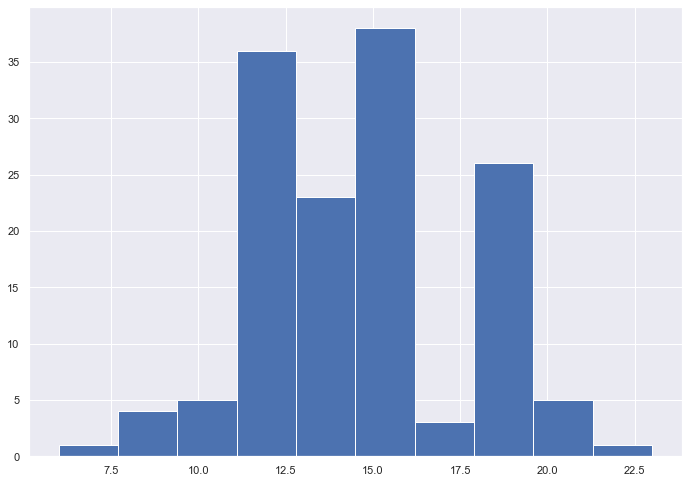

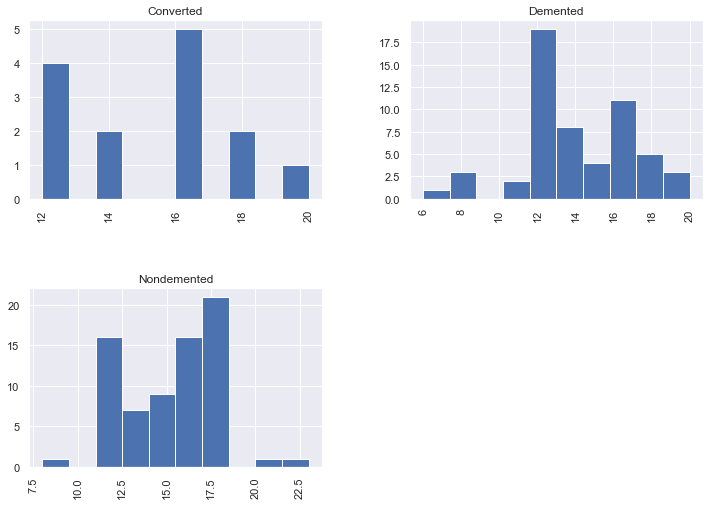

In [35]:
oasis2_unique.EDUC.hist()
oasis2_unique.EDUC.hist(by=oasis2_unique.Group)

array([[<AxesSubplot:title={'center':'Converted'}>,
        <AxesSubplot:title={'center':'Demented'}>],
       [<AxesSubplot:title={'center':'Nondemented'}>, <AxesSubplot:>]],
      dtype=object)

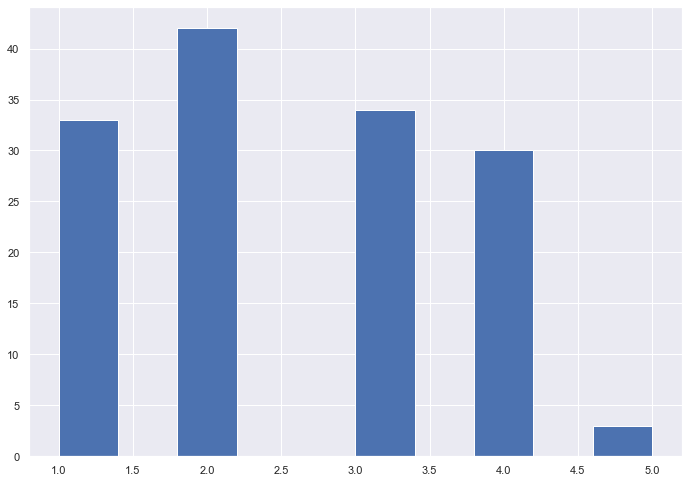

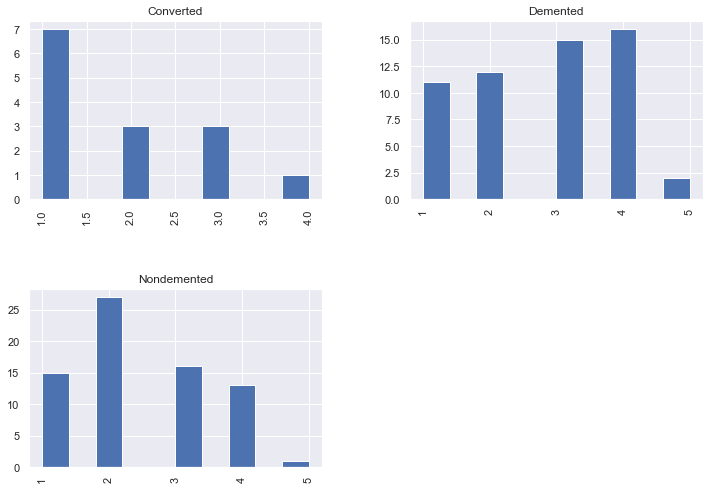

In [36]:
oasis2_unique.SES.hist()
oasis2_unique.SES.hist(by=oasis2_unique.Group)

array([[<AxesSubplot:title={'center':'Converted'}>,
        <AxesSubplot:title={'center':'Demented'}>],
       [<AxesSubplot:title={'center':'Nondemented'}>, <AxesSubplot:>]],
      dtype=object)

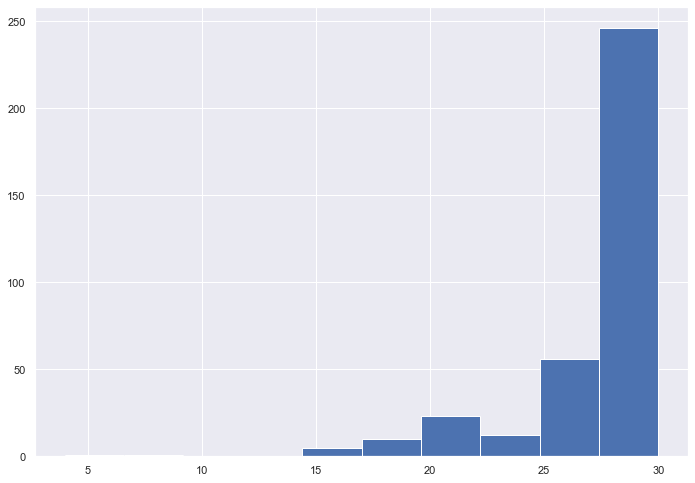

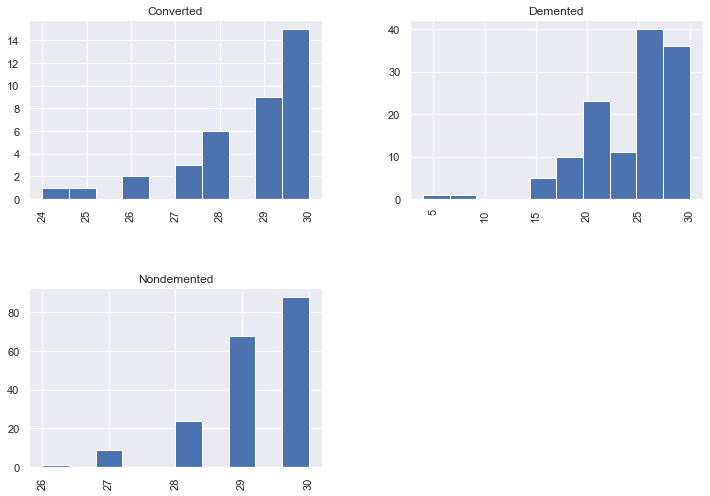

In [37]:
oasis2.MMSE.hist()
oasis2.MMSE.hist(by=oasis2.Group)

array([[<AxesSubplot:title={'center':'Converted'}>,
        <AxesSubplot:title={'center':'Demented'}>],
       [<AxesSubplot:title={'center':'Nondemented'}>, <AxesSubplot:>]],
      dtype=object)

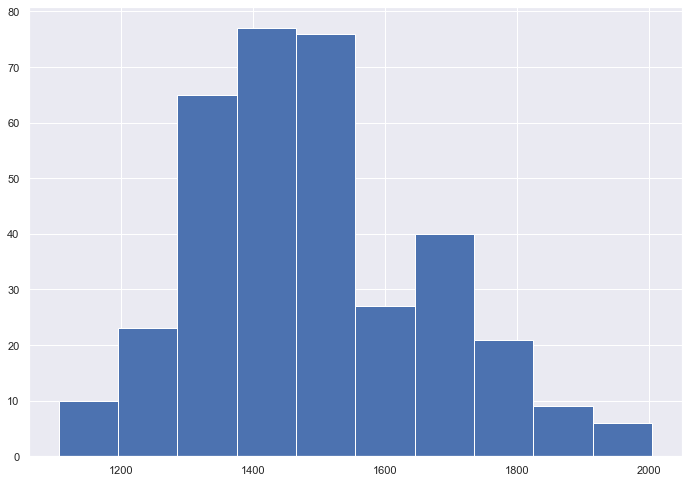

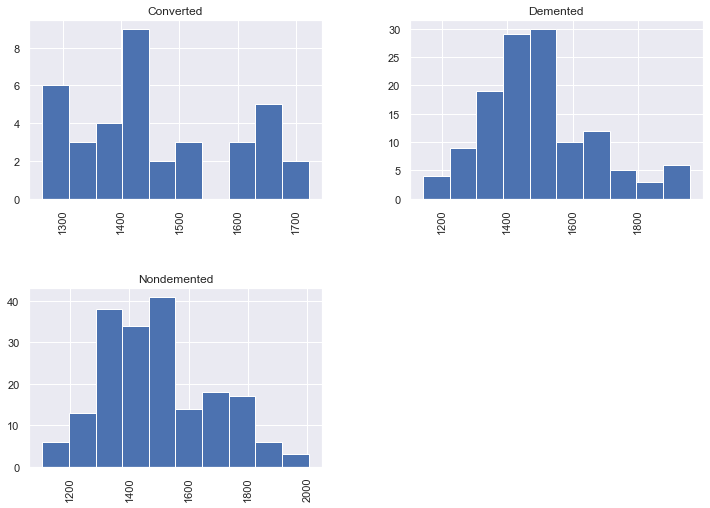

In [38]:
oasis2.eTIV.hist()
oasis2.eTIV.hist(by=oasis2.Group)

array([[<AxesSubplot:title={'center':'Converted'}>,
        <AxesSubplot:title={'center':'Demented'}>],
       [<AxesSubplot:title={'center':'Nondemented'}>, <AxesSubplot:>]],
      dtype=object)

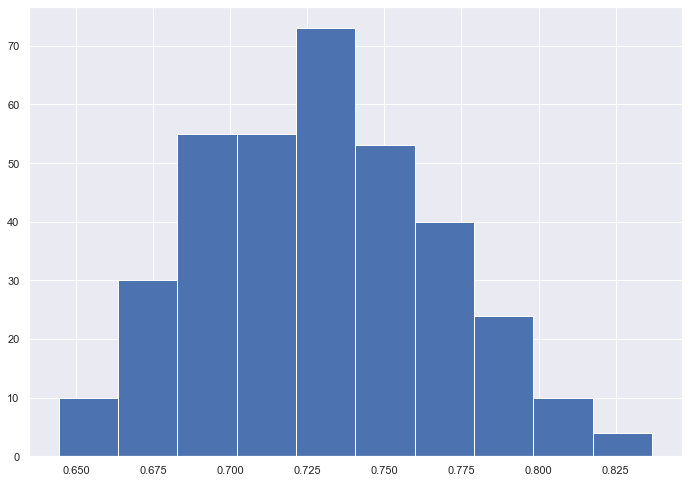

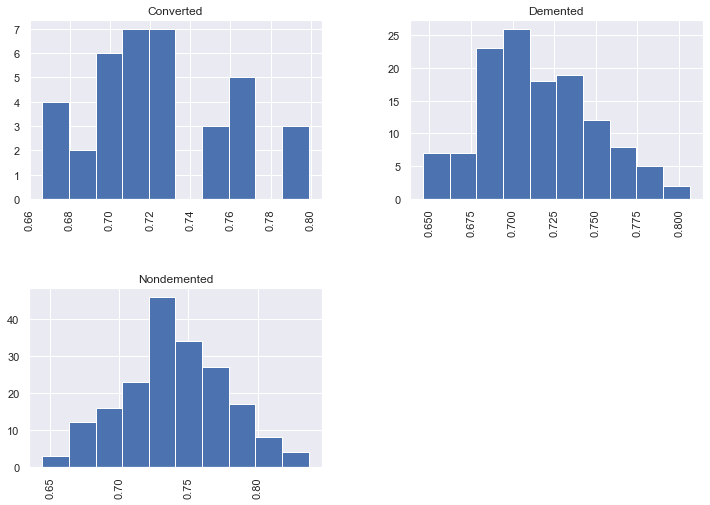

In [39]:
oasis2.nWBV.hist()
oasis2.nWBV.hist(by=oasis2.Group)

As we can see from the histograms above, there were more female than male participants in the study, and more female participants were converted from a nondemented to a demented diagnosis.

Somewhat surprisingly, the demented Age group seemed to skew younger than the nondemented.

The years of Education of the nondemented group seemed to be fewer than the demented and converted groups combined.

The socioeconomic status of the nondemented group was also skewed further left than the demented group.

It is hard to observe a trend with MMSE and eTIV between groups from the histograms, but the brain volume distribution is clearly more normal in the nondemented group, and skewed further left in the converted and demented groups combined.  

Let's check for outliers again in the eTIV and nWBV variables. 

<AxesSubplot:xlabel='Group', ylabel='eTIV'>

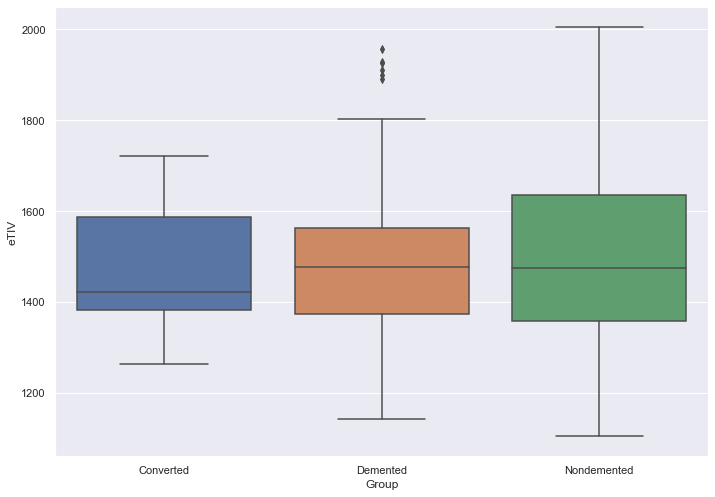

In [40]:
sns.boxplot(x=oasis2.Group,y=oasis2.eTIV)

<AxesSubplot:xlabel='Group', ylabel='nWBV'>

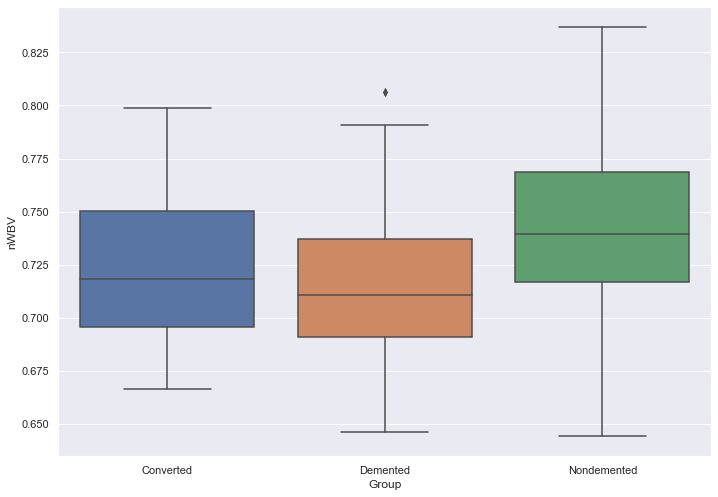

In [41]:
sns.boxplot(x=oasis2.Group,y=oasis2.nWBV)

All of the above boxplots indicate very few outliers, all of them in the Demented group. I feel that it is appropriate to leave in these data points to enrich the data, since all outliers are reasonable and are within the scope for Nondemented participants as well. 

Now let's take a look at the correlation matrix of this dataset, both the full and unique datasets so we are not double-counting.

<AxesSubplot:>

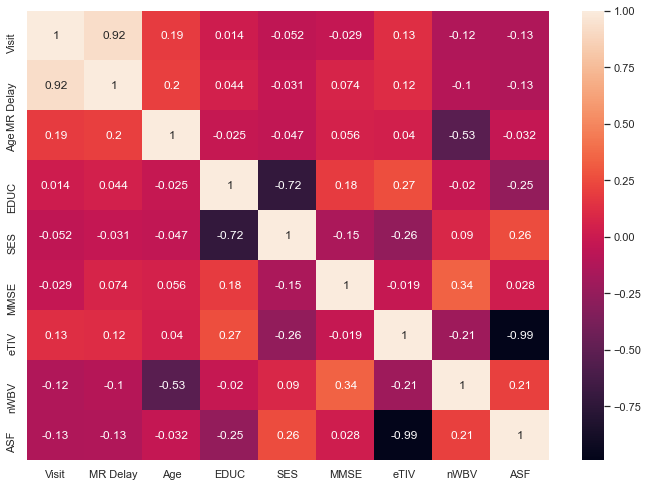

In [42]:
sns.heatmap(oasis2.corr(),annot=True)

<AxesSubplot:>

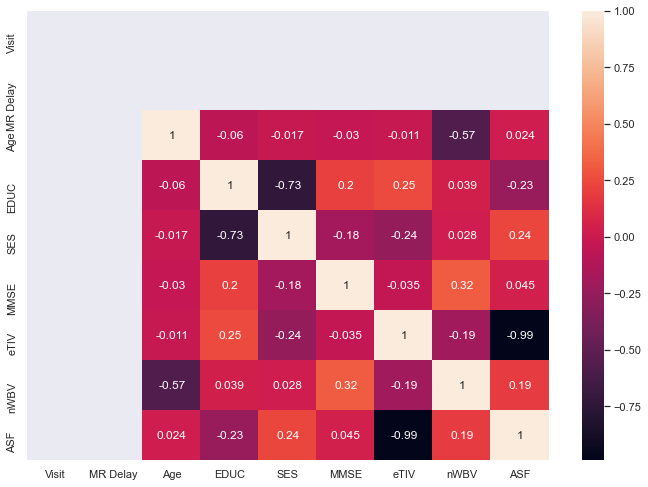

In [43]:
sns.heatmap(oasis2_unique.corr(),annot=True)

While the exact correlation numbers are changed a bit between heatmaps, the overall color distribution is much the same.

Again, we see the negative correlation between nWBV and Age, as well as between eTIV and ASF. There is a negative correlation between education and socioeconomic status, interestingly, as well as an expected positive correlation between the MMSE and nWBV. 

Let's group the dataframe by patient and see what information we gain from that view. 

In [44]:
mix = oasis2.set_index(["Subject ID","Visit"])
mix

MRI ID        Group  MR Delay M/F  Age  EDUC  SES  \
Subject ID Visit                                                             
OAS2_0001  1      OAS2_0001_MR1  Nondemented         0   M   87    14  2.0   
           2      OAS2_0001_MR2  Nondemented       457   M   88    14  2.0   
OAS2_0004  1      OAS2_0004_MR1  Nondemented         0   F   88    18  3.0   
           2      OAS2_0004_MR2  Nondemented       538   F   90    18  3.0   
OAS2_0005  1      OAS2_0005_MR1  Nondemented         0   M   80    12  4.0   
...                         ...          ...       ...  ..  ...   ...  ...   
OAS2_0185  2      OAS2_0185_MR2     Demented       842   M   82    16  1.0   
           3      OAS2_0185_MR3     Demented      2297   M   86    16  1.0   
OAS2_0186  1      OAS2_0186_MR1  Nondemented         0   F   61    13  2.0   
           2      OAS2_0186_MR2  Nondemented       763   F   63    13  2.0   
           3      OAS2_0186_MR3  Nondemented      1608   F   65    13  2.0   

                  MMSE  CDR         eTIV      nWBV       ASF  
Subject ID Visit                                              
OAS2_0001  1      27.0  0.0  1986.550000  0.696106  0.883440  
           2      30.0  0.0  2004.479526  0.681062  0.875539  
OAS2_0004  1      28.0  0.0  1215.330000  0.709512  1.444060  
           2      27.0  0.0  1200.100000  0.718214  1.462380  
OAS2_0005  1      28.0  0.0  1688.580000  0.711502  1.039330  
...                ...  ...          ...       ...       ...  
OAS2_0185  2      28.0  0.5  1692.880000  0.693926  1.036690  
           3      26.0  0.5  1688.009649  0.675457  1.039686  
OAS2_0186  1      30.0  0.0  1319.020000  0.801006  1.330540  
           2      30.0  0.0  1326.650000  0.795981  1.322890  
           3      30.0  0.0  1332.944463  0.801248  1.316634  

[354 rows x 12 columns]

[Text(0.5, 0, 'Subjects')]

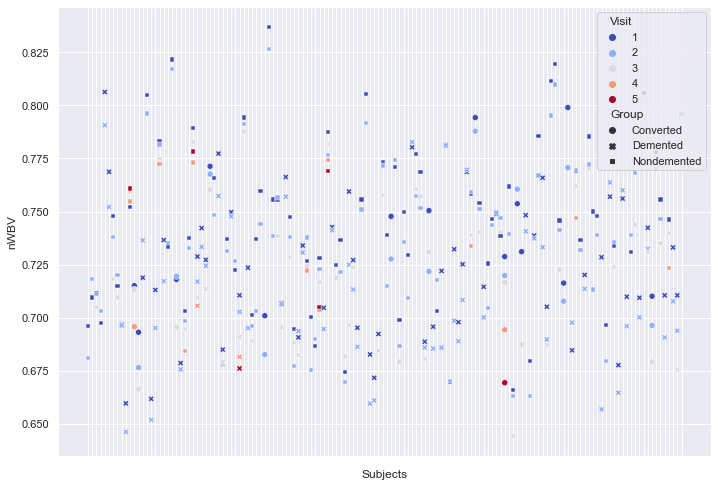

In [45]:
sc1 = sns.scatterplot(x="Subject ID",y="nWBV",hue="Visit",style="Group",palette="coolwarm",data=mix)
sc1.set(xticklabels=[])  
sc1.set(xlabel = "Subjects")

As can be seen from the above plot, for each individual subject, as the hue gets darker, toward the "warm" side of red of the hue indicating that that visit is later, the whole brain volume estimate decreases. Looking at the Demented and Converted groups, those groups seem to decrease faster than the Nondemented groups. Let's look at a similar plot, this time looking at the eTIV value.

[Text(0.5, 0, 'Subjects')]

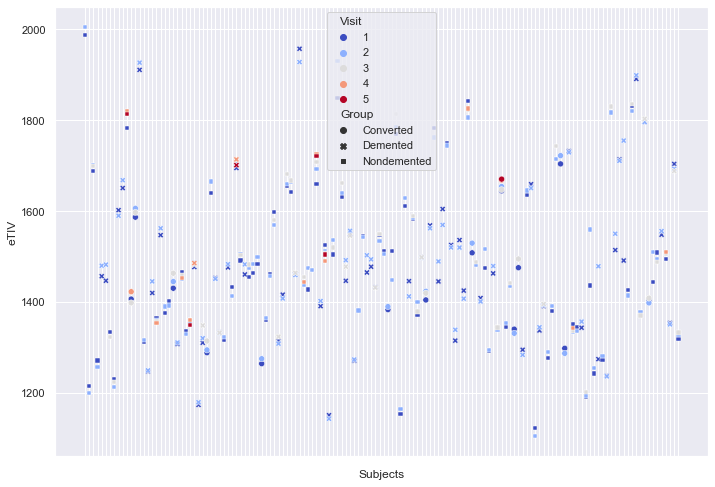

In [46]:
sc2 = sns.scatterplot(x="Subject ID",y="eTIV",hue="Visit",style="Group",palette="coolwarm",data=mix)
sc2.set(xticklabels=[])  
sc2.set(xlabel = "Subjects")

There is not as clear of a correlation between visits and eTIV value; we can therefore assume that intracranial volume is not as strongly influenced by age and by dementia. 

Unfortunately we do not have the date of these MRIs so we can't find how much time influences volume in between each MRI scan. 